# Module 5 - Generalisation Theory and the Bias–Variance Tradeoff

## Module Overview

- This module focuses on some of the core concepts of machine learning, including **generalisation theory** and the **bias-variance tradeoff**. These concepts help you analyse the fundamental question of how and when you can learn from data, both in a theoretical sense and in terms of practical applications.
- In other words: the aim to is to understand how and when we can learn from data. This module looks at how to do this both theoretically using generisation theory, and practically use test-train and validation sets to navigate bias-variance tradeoff

## Learning outcomes

- LO1: Identify when it is feasible to draw meaningful conclusions from data. 
- LO2: Calculate the probability of selecting the correct model from a given number of samples.
- LO3: Describe important components of generalisation bounds.
- LO4: Select a model that best fits a set of data using a training set and validation set.
- LO5: Estimate the fit of a selected model on new, unseen data, using a test set. 

## Misc and Keywords

- **Deterministic** assumes that there is no randomness in the system, so the same inputs will always return the exact same outputs
- **Stochastic** assumes that there is some randomness (noise) that we cannot account for in the system, meaning that the same input will give a slightly different output each time. This is exactly how real world data works
- **Probabilistic Setting** refers to approaching machine learning problems from a probability theory perspective. Rather than making deterministic predictions, the model expresses uncertainty through probability distributions.
    - For example, instead of predicting that it will rain today, a probabilistic model might say there's a 75% chance of it raining. This setting acknowledges inherent uncertainty in real-world data and predictions.
- **Stationarity** is a property where the statistical characteristics of data remain constant over time. There are different types:
    - ***Strict stationarity*** means the entire probability distribution stays unchanged over time
    - ***Weak stationarity*** (or covariance stationarity) means key statistical properties like mean and variance remain constant
    - For example, if you're analysing daily temperature data, it would be stationary if the average temperature and temperature variations remained similar across years. Non-stationary data might show trends or seasonal patterns that make past data less relevant for future predictions.
- **A Priori Knowledge** refers to information we know before analysing the data - our assumptions and domain expertise that we build into the model. This could include:
    - Physical constraints (like knowing values must be positive)
    - Domain expertise (like knowing certain features are more important)
    - Mathematical assumptions (like knowing the relationship should be linear)
    - For example, when building a model to predict the weather, a priori knowledge might include that we are more like to get less rain in summer. This knowledge then helps guide the model design and can improve performance.
- **Generalisation Bound** allows for the rigorous quantification of how much data is needed to make predictions about unseen data.
- It is a mathematical guarantee that limits how differently a machine learning model will perform on unseen test data compared to its performance on training data. These bounds help us understand when we can trust our model to work well on new examples, providing an upper limit on the difference between the empirical risk (error on training data) and the expected risk (expected error on the overall data distribution)
    - For example, a generalisation bound might tell us: "With 95% confidence, the test error will be at most 3% higher than the training error." This is incredibly useful because:
        - It helps us decide if we need more training data
        - It guides us in choosing model complexity
        - It provides theoretical justification for regularisation techniques
        - It helps explain why simpler models often work better in practice
    - The amount of data needed, $N$ is defined as
        - $N \geq \frac{log(\frac{\delta}{H-1})}{log(1 - \epsilon)}$ where
            - $\delta$ is the probabiltiy of an incorrect candidate function specifying all of the samples
            - $H$ is the number of candidate functions
            - $\epsilon$ is the error rate   
- The **bias-variance tradeoff** is the balance, in machine learning, to build models that work well with both the data they have seen and new unseen data, put simply:
    - Imagine you are learning how to shoot arrows at a target.
        - **Bias** refers to how far off your arrows are from the center of the target on average. If you are consistently missing in the same way (e.g., always hitting above the target), you have high bias — meaning your technique is overly simplified or "wrong."
        - **Variance** refers to how spread out your arrows are. If your shots are all over the place — sometimes hitting near the center, sometimes far off — you have high variance, meaning your technique is too sensitive to small changes and unpredictable.
    - High bias means the model is too simple and misses important patterns in the data. This is called **underfitting**.
    - High variance means the model is too complex and overly focused on the training data, capturing noise instead of true patterns. This is called **overfitting**.
    - The tradeoff is finding the sweet spot where the model is not too simple (low bias) but also not too complex (low variance). This balance helps the model perform well on new, unseen data.

## Generalisation Theory

- **Generalisation theory**, in simple terms, is about understanding how well a machine learning model can apply what it has learned from the training data to new, unseen data.
- Imagine you’re teaching a child to recognise apples by showing them pictures of apples. If the child learns to recognise apples only from those specific pictures and fails to identify apples in real life or in other pictures, they’ve "memorised" rather than "understood." Generalisation theory helps us figure out how well the "child" (or the model) is likely to perform on new examples, not just the ones it has already seen.
- **Laplace’s rule of succession** is a way of estimating the probability of an event happening in the future, based on past observations, while account for uncertainty with limited data, define as
    - $P(\text{next event is a success}) = \frac{s+1}{n+2}$, where
        - $s$ is the number of times the event has happened
        - $n$ is the total number of trials 

#### Question taken from the course
For a coin with $\mathbb{P}[\text{head}] = \theta$, what is the probability of having $s$ heads out of $n$ (independent) flips? (Recall the Binomial distribution.) 

Compute this value for $n=10$, $s = 3$, $\theta = 0.6$.

- **Maximum likelihood approach**

    - P = $(\frac{n}{s})\theta^s(1-\theta)^{n-s}$
    - $(\frac{n}{s})$ is the binomial coefficient which is $(\frac{n!}{s!(n-s)!})$
    - P($s$ heads out of $n$) = $(\frac{10!}{3!(10-3)!})\cdot 0.6^3 \cdot (1 - 0.6)^{10-3} = 0.0425$ 

In [46]:
from math import comb

n = 10
s = 3
theta = 0.6 # the probability of heads

likelihood = comb(n,s)*(theta**s)*((1-theta)**(n-s))
round(likelihood,4)

0.0425

### Estimating the Probability Distribution of $\theta$

Given that we have $s$ heads in total out of $n$ flips, we want to find the **probability distribution** for $\theta \in [0, 1]$, which we'll denote as $f(\theta)$.

#### 1. What Are We Trying to Find?

We know that the probability of getting heads on any given flip is $\theta$. However, $\theta$ is **unknown**. We want to estimate it based on the data we have: the number of heads ($s$) observed out of $n$ flips. 

Our goal is to estimate a **probability distribution** for $\theta$, that tells us how likely different values of $\theta$ are, based on the observed data. That is, we want to know what the probabiltiy is, based on the data we have.

---

#### 2. How Do We Estimate $\theta$?

We want to find the **probability distribution** $f(\theta)$, which will give us the "likelihood" of different values of $\theta$. 

In simple terms, if a particular value of $\theta$ makes the data we observed (the number of heads) more likely, that value of $\theta$ should have a higher probability in our distribution.

#### 3. Likelihood of Data Given $\theta$

To form this distribution, we first need to compute the **likelihood function**, which tells us how probable our data is for different values of $\theta$. 

- We know the total number of flips is $n$.
- Out of these, we observed $s$ heads. 
- We want to calculate the likelihood for each possible value of $\theta$ (the probability of heads on a single flip).

The likelihood of observing $s$ heads, given a value of $\theta$, is given by the **binomial distribution** formula:

$$
L(\theta) = \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s}
$$

This expression has three parts:
- $ \binom{n}{s} $ is how many ways we could have observed $s$ heads out of $n$ flips.
- $ \theta^s $ is the probability of getting heads on $s$ flips.
- $ (1 - \theta)^{n - s} $ is the probability of getting tails on the remaining flips.

This gives us the likelihood of seeing the data $s$ heads for a given value of $ \theta $.

---

#### 4. Proportional to the Likelihood

Now, we want to convert the likelihood function into a **probability distribution** for $ \theta$. This is where the Bayesian approach comes in.

The idea is simple: we want the probability of $ \theta $ to be **proportional** to the likelihood of the data. In other words:
- If $ \theta $ makes the data more likely, we assign it a higher probability.
- If $ \theta $ makes the data less likely, we assign it a lower probability.

So, we say that our probability distribution $f(\theta)$ is proportional to the likelihood function $ L(\theta) $:

$$
f(\theta) \propto \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s}
$$

Here, the $ \propto $ symbol means "proportional to". This just means that the probability distribution for $ \theta $ is some constant multiple of the likelihood.

---

#### 5. Final Formula for $f(\theta)$

To turn this proportionality into a **proper probability distribution**, we need to find a constant \( C \) that makes sure the total probability across all possible values of \( \theta \) sums to 1 (since the total probability in any probability distribution must always be 1).

This constant $ C $ will normalise our distribution. So we multiply our expression for $ f(\theta) $ by $ C $ to get the final formula:

$$
f(\theta) = C \cdot \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s}
$$

Where $ C $ is a constant that we'll solve for.

---

### Bayesian Approach: Finding the Expression for $C$

#### 1. Why Do We Need $C$?

To make $ f(\theta) $ a valid probability distribution, the total probability must add up to 1. That means the integral of $ f(\theta) $ over all possible values of $ \theta $ (from 0 to 1) must equal 1.

Think of it like this: We have a **curve** that represents the probability of each possible value of $ \theta $. To ensure the area under this curve equals 1 (so it's a valid probability), we need to "scale" the curve using the constant $ C $.

#### 2. Integral of $ f(\theta) $ Over $ \theta $

We now want to compute the integral of $f(\theta) $ over $ \theta $ from 0 to 1. This is done to ensure that the total area under the curve equals 1.

So, we set up the equation:

$$
\int_0^1 f(\theta) \, d\theta = 1
$$

Substitute $ f(\theta) = C \cdot \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s} $:

$$
\int_0^1 C \cdot \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s} \, d\theta = 1
$$

Since $ \binom{n}{s} $ is a constant with respect to $\theta $, we can pull it out of the integral:

$$
C \cdot \binom{n}{s} \int_0^1 \theta^s (1 - \theta)^{n - s} \, d\theta = 1
$$

#### 3. Recognising the Beta Function

The integral:

$$
\int_0^1 \theta^s (1 - \theta)^{n - s} \, d\theta
$$

is a **Beta function** integral, and we know that:

$$
\int_0^1 \theta^s (1 - \theta)^{n - s} \, d\theta = \frac{s! (n - s)!}{(n + 1)!}
$$

This is a standard result in probability theory.

#### 4. Solving for \( C \)

Now we can substitute this result into our equation:

$$
C \cdot \binom{n}{s} \cdot \frac{s! (n - s)!}{(n + 1)!} = 1
$$

Simplifying the terms:

$$
C = \frac{(n + 1)!}{\binom{n}{s} \cdot s! (n - s)!}
$$

This gives us the value of the constant \( C \), ensuring that the total probability distribution sums to 1.

---

### Summary

In Bayesian statistics, we used the likelihood of the data to form a probability distribution for \( \theta \). To ensure this distribution is valid, we used the **Beta function** and integrated the distribution over all possible values of $ \theta $ to find the constant $ C $. The final formula for the probability distribution is:

$$
f(\theta) = \frac{(n + 1)!}{\binom{n}{s} \cdot s! (n - s)!} \cdot \binom{n}{s} \cdot \theta^s \cdot (1 - \theta)^{n - s}
$$

This ensures that $ f(\theta)$ is a valid probability distribution that sums to 1 and represents our updated belief about $ \theta $ given the data.


#### Question: 
Plot $f(\theta)$ for the sequences:
- 3 heads out of 3 flips
- 5 heads out of 5 flips
- 9 heads out of 10 flips
- 2 heads out of 10 flips

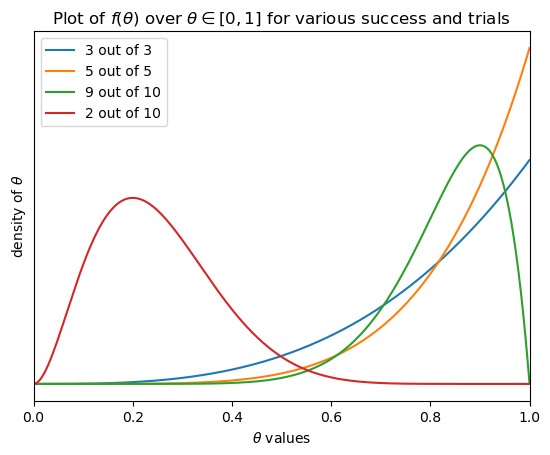

In [47]:
import numpy as np
from matplotlib import pyplot as plt
def density_theta(n,s, theta):
    return (n+1)*comb(n,s)*(theta**s)*((1-theta)**(n-s))
    
divide = 1000 # number of points along x

thetas = np.linspace(0, 1, divide)

#1
C1 = np.array(list(map(density_theta,3*np.ones(divide).astype(int),3*np.ones(divide).astype(int), thetas)))

#2
C2 = np.array(list(map(density_theta,5*np.ones(divide).astype(int),5*np.ones(divide).astype(int), thetas)))

#3
C3 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),9*np.ones(divide).astype(int), thetas)))

#4
C4 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),2*np.ones(divide).astype(int), thetas)))


plt.plot(thetas, C1, label='3 out of 3')
plt.plot(thetas, C2, label='5 out of 5')
plt.plot(thetas, C3, label='9 out of 10')
plt.plot(thetas, C4, label='2 out of 10')
plt.yticks([])

plt.xlabel(r'$\theta$ values')
plt.ylabel(r'density of $\theta$')
plt.title(r"Plot of $f(\theta)$ over $\theta \in [0,1]$ for various success and trials")
plt.yticks()
plt.xlim([0,1])
plt.legend()
plt.show()

### Probability in the next event

#### Question:
Given $f(\theta)$ as we derived above, if you see $s$ Heads out of $n$ trials, what is the probability that you will have a Head in the next ($n+1$-th) flip? 

---

#### Explanation in Layman Terms

The probability of getting a Head on the $(n+1)$-th flip depends on our updated belief about $\theta$ after observing $s$ Heads out of $n$ flips. By the **law of total probability**, we combine the contributions of all possible values of $\theta$, weighted by how likely those values of $\theta$ are (as given by $f(\theta)$).

1. **What We Know**:
   - $\theta$ is the probability of getting Heads on any single flip.
   - After observing $s$ Heads in $n$ flips, our updated belief about $\theta$ is described by the probability distribution $f(\theta)$.
   - The probability of getting Heads on any given flip is just $\theta$ itself.

2. **Using the Law of Total Probability**:
   To calculate the probability of Heads on the next flip, we take into account all possible values of $\theta$, weighted by $f(\theta)$:
   $$
   \mathbb{P}[\text{Head on $n+1$-th flip} \ | \ \text{$s$ Heads out of $n$ flips previously}] =  
   \int_{x \in [0,1]} \mathbb{P}[\text{Heads} \ | \ \theta] \cdot f(\theta) \, \mathrm{d}\theta
   $$

3. **Simplifying the Expression**:
   - The probability of getting Heads on a single flip, given a particular value of $\theta$, is just $\theta$ itself.
   - Substituting this into the formula:
     $$
     \mathbb{P}[\text{Head on $n+1$-th flip} \ | \ \text{$s$ Heads out of $n$ flips previously}] = 
     \int_{x \in [0,1]} \theta \cdot f(\theta) \, \mathrm{d}\theta
     $$
   - This is equivalent to calculating the **expected value** (average) of $\theta$, denoted as $\mathbb{E}[\theta]$.

4. **The Result**:
   Using the formula for the expected value of $\theta$ in a Beta distribution (derived from $f(\theta)$), we know:
   $$
   \mathbb{E}[\theta] = \frac{s+1}{n+2}
   $$

This means the probability of getting a Head on the $(n+1)$-th flip, given $s$ Heads out of $n$ flips, is:
$$
\mathbb{P}[\text{Head on $n+1$-th flip}] = \frac{s+1}{n+2}
$$

---

#### Intuition Behind the Result

- The formula $\frac{s+1}{n+2}$ adjusts our belief about $\theta$ based on the data we've observed.
- If we had no prior flips, the probability of getting Heads would be $0.5$ (uniform belief that $\theta$ could be anywhere between 0 and 1).
- As we observe more flips, the formula gives more weight to the actual outcomes ($s$ Heads out of $n$ flips), refining our estimate of $\theta$.

For example:
- If $n = 10$ and $s = 6$, the probability of a Head on the next flip would be:
  $$
  \mathbb{P}[\text{Head on $n+1$-th flip}] = \frac{6+1}{10+2} = \frac{7}{12}.
  $$
- This shows how the result is based both on the observed data and a small adjustment from the Bayesian prior.

---

#### Final Answer:

$$
\mathbb{P}[\text{Head on $n+1$-th flip}] = \frac{s+1}{n+2}.
$$

Which is known as **Laplace Rule of Succession**

## Probabilistic Settings and Interpreting the Bound

**Here is an example to help understand this section**

We are tasked with determining how many samples $n$ are required to confidently identify the correct function from a set of 1,000 candidate functions. We want to do this with 99.9% confidence, and we know that each incorrect function has a 1% error rate.

This is a typical scenario where we use **generalisation bounds** to ensure we have enough samples to confidently select the correct function.

### Generalisation Bound Formula

The generalisation bound formula tells us how many samples $n$ are needed to be sure we select the correct function with a certain level of confidence. The formula is:

$$
n \geq \frac{\log\left(\frac{\delta}{N-1}\right)}{\log(1 - \epsilon)}
$$

Where:
- $n$ = number of samples needed,
- $\delta$ = desired confidence level (in this case, 99.9% confidence, so $\delta = 0.001$),
- $N$ = number of candidate functions (in this case, $N = 1000$),
- $\epsilon$ = error rate of incorrect functions (in this case, 1%, so $\epsilon = 0.01$).

#### Step-by-Step Calculation for $n$

Given:
- $N = 1000$ (number of candidate functions),
- $\delta = 0.001$ (99.9% confidence),
- $\epsilon = 0.01$ (error rate for incorrect functions),

Substitute these values into the formula:

$$
n \geq \frac{\log\left(\frac{0.001}{999}\right)}{\log(1 - 0.01)}
$$

Now, compute the individual terms:
- $\frac{0.001}{999} \approx 1.001 \times 10^{-6}$,
- $\log(1.001 \times 10^{-6}) \approx -6$,
- $\log(0.99) \approx -0.00434$.

Substitute these into the formula:

$$
n \geq \frac{-6}{-0.00434} \approx 1382.
$$

So, **we need at least 1,382 samples** to confidently identify the correct function.

#### Conclusion

To confidently identify the correct function from a set of 1,000 candidate functions with 99.9% confidence, the required number of samples is **1,382**. This result is calculated using the generalisation bound formula and accounts for the error rate of the incorrect functions and the desired confidence level.

### Candidate Functions

- In this context, candidate functions refer to a set of potential models or solutions that could be used to predict outcomes or classify data. You don't know which one is the "correct" one, but you suspect that one of them is, based on the data you're working with.
- **Think of it like this:**
    - Imagine you are trying to pick the right recipe for a cake from a cookbook.
    There are 1,000 recipes (candidate functions), and only one recipe will give you the cake you want (the correct function).
    - You don't know which one is correct, but based on your experiments (data), you can figure it out.
    - To identify the correct recipe (or function), you need to test them out. The more recipes you try (the more data samples you collect), the more confident you become in identifying the right one.
- **In Mathematical Terms:**
    - Candidate functions are mathematical models or algorithms that might explain the relationship between inputs (like ingredients in the cake example) and outputs (the final cake result).
    - Some functions may be better than others, but you don't know which one is truly the best without testing.   The correct function is the one that accurately captures the relationship in your data.
- **Why Do We Care About Samples?**
    - As you test more "samples" (data points), you get more evidence to choose the right function. But, because testing takes time, effort, and resources, generalisation bounds help us determine how many samples are required to confidently pick the correct function from a set of candidates, considering the error rates of the incorrect functions.
    - In other words, it's a way to figure out how many experiments (data points) you need to be nearly 100% sure you're choosing the correct recipe (function), given a set of 1,000 or 2,000 candidates.

In [158]:
import math

def calculate_samples(delta, N, epsilon):
    """
    Calculate the minimum number of samples needed
    - delta: desired confidence level (e.g., 0.001 for 99.9% confidence)
    - N: number of candidate functions
    - epsilon: error rate of incorrect functions (e.g., 0.01 for 1%)
    """
    # Not the log 
    numerator = math.log(delta / (N - 1))
    denominator = round(math.log(1 - epsilon), 3)
    n = math.ceil(numerator / denominator)
    return (n, denominator, numerator)

# parameters
delta = 0.001  # 99.9% confidence
N = 1000       # number of candidate functions
epsilon = 0.01  # 1% error rate

# Output
n, denominator, numerator = calculate_samples(delta, N, epsilon)

print(f"log10(delta/(N-1)) = {numerator:.3f}") 
print(f"log10(1-epsilon) = {denominator:.7f}") 

print(f"Number of samples needed: {n}") 

log10(delta/(N-1)) = -13.815
log10(1-epsilon) = -0.0100000
Number of samples needed: 1382


## When is Machine Learning Feasible

- Machine learning becomes feasible when you make the following assumptions (Taken from course)
    - **A probabilistic setting**: Assume that training data comes from independant selections of some overall population
    - **Stationarity**: Future data is drawn according to the same rules as the data we have seen already, that is we exepct future data to follow similar rules. The **generalisation bound** function which is discussed above, can be used to ensure the probability of selecting an incorrect candidate function that correctly predicts all of our training data arbitrarily small 
    - **A priori knowledge**: the function to be learnt is not completely arbitrary and that there are a finite number of possible functions

## Which Fit is Right?

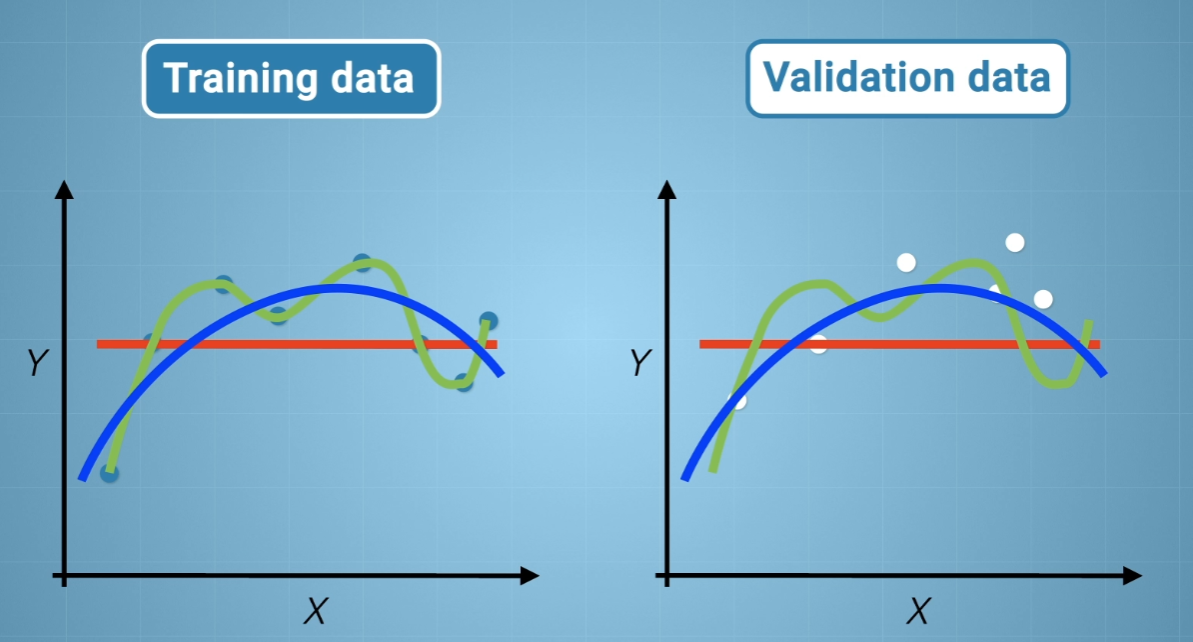

- When selecting what model best fits the data, you should specficially use the performance on the validation data, and not the training set.
- The image above illustrates this where
    -  the red line underfits recording poor results on both the training and validation set
    -  the green line overfits the training data thus resulting in poor performance on the validation set
    -  The blue line is the trade off which allows for some error on both the training and validation, but not much.

### Example using train and test data

In [49]:
import numpy as np
np.random.seed(3)

n = 100 # number of elements
X = np.random.uniform(high=75, size=n)
Y = 10*np.exp(0.03*X) + np.random.normal(0, 20, size=n) # Add noise
xy_points = np.column_stack((X, Y))

xy_points[:10]

array([[ 41.30984269,  46.81333261],
       [ 53.1110867 ,  32.44293882],
       [ 21.81785542,  22.14375237],
       [ 38.31207039,  54.9194355 ],
       [ 66.97102158,  74.08622971],
       [ 67.22198167,  57.35869962],
       [  9.41889828, -45.04944922],
       [ 15.54321586,  -3.4960147 ],
       [  3.86004025,  -0.59384826],
       [ 33.06073827,  16.63308035]])

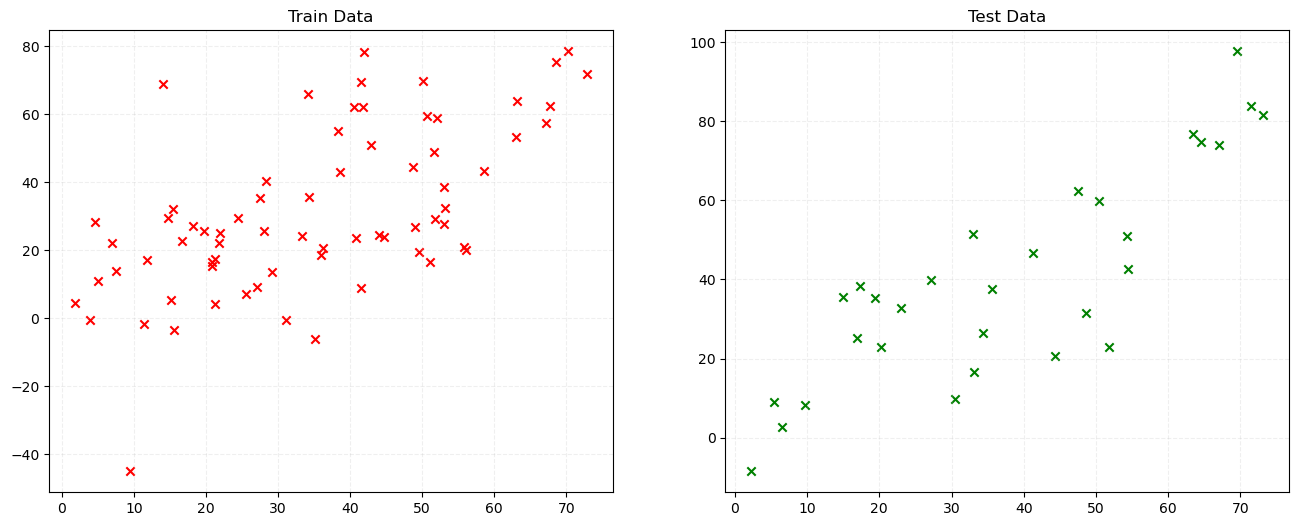

In [50]:
from sklearn.model_selection import train_test_split

# split into a test/train 70:30 ratio.
train, test = train_test_split(xy_points, test_size=0.3, random_state=42)  # random_state for reproducibility

# Fit the models
x_train = train[:, 0]
y_train = train[:, 1]
x_test = test[:, 0]
y_test = test[:, 1]

# Visualise data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax = axs.flatten()
ax[0].set_title('Train Data')
ax[0].scatter(x_train, y_train, marker='x', color='r', label='train data')
ax[0].grid(True, linestyle='--', alpha=0.2)

ax[1].set_title('Test Data')
ax[1].scatter(x_test, y_test, marker='x', color='g', label='test data')
ax[1].grid(True, linestyle='--', alpha=0.2)

# Show the plot
plt.show()

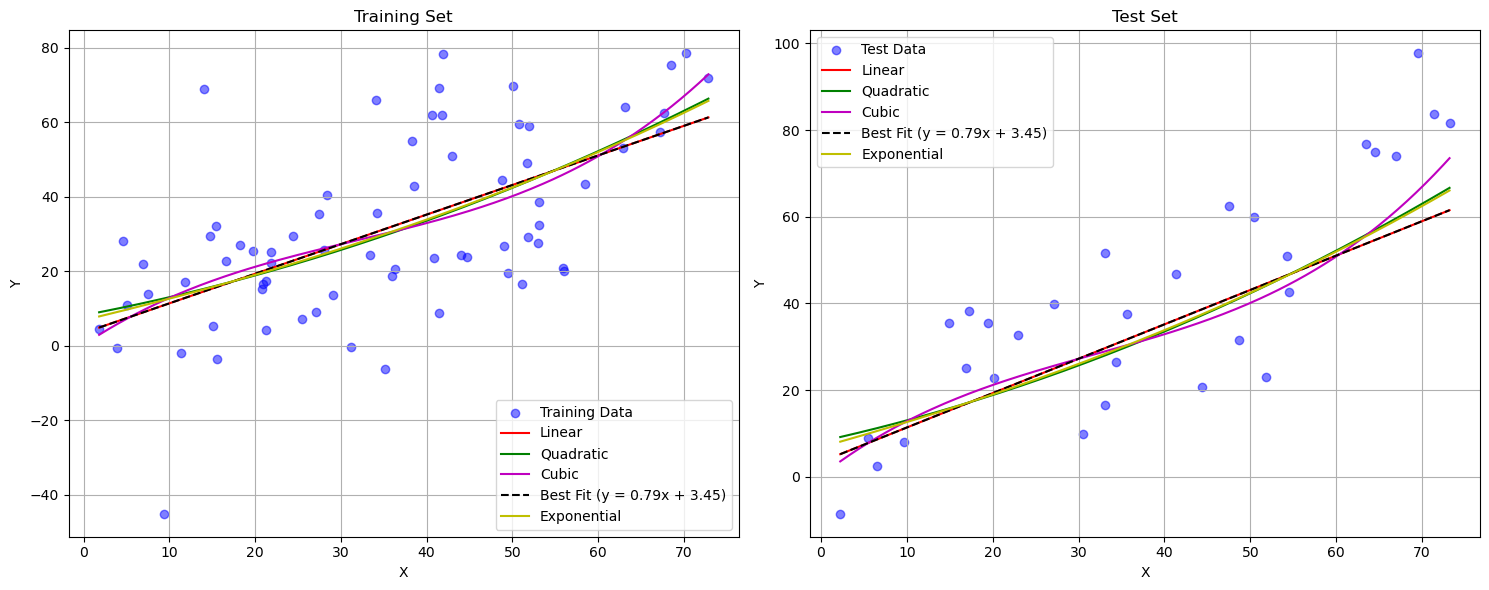


Line of Best Fit equation: y = 0.79x + 3.45


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# Fit functions
def linear(x, m, c):
    return m*x + c

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def exponential(x, a, b):
    return a + b*np.exp(x/100)  # Scaled x to avoid overflow

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


# Fit line of best fit (using sklearn)
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# Fit all models
linear_params, _ = curve_fit(linear, x_train, y_train)
quad_params, _ = curve_fit(quadratic, x_train, y_train)
cubic_params, _ = curve_fit(cubic, x_train, y_train)

# Make predictions
linear_pred_train = linear(x_train, *linear_params)
linear_pred_test = linear(x_test, *linear_params)
quad_pred_train = quadratic(x_train, *quad_params)
quad_pred_test = quadratic(x_test, *quad_params)
cubic_pred_train = cubic(x_train, *cubic_params)
cubic_pred_test = cubic(x_test, *cubic_params)

# Try exponential fit
try:
    exp_params, _ = curve_fit(exponential, x_train, y_train, maxfev=2000)
    exp_pred_train = exponential(x_train, *exp_params)
    exp_pred_test = exponential(x_test, *exp_params)
    exp_fit_success = True
except:
    print("Warning: Exponential fit failed to converge")
    exp_fit_success = False

# Calculate metrics
train_metrics = {
    'Best Fit Line': {
        'RMSE': rmse(y_train, reg.predict(x_train.reshape(-1, 1))),
        'R2': r2_score(y_train, reg.predict(x_train.reshape(-1, 1)))
    },
    'Linear': {
        'RMSE': rmse(y_train, linear_pred_train),
        'R2': r2_score(y_train, linear_pred_train)
    },
    'Quadratic': {
        'RMSE': rmse(y_train, quad_pred_train),
        'R2': r2_score(y_train, quad_pred_train)
    },
    'Cubic': {
        'RMSE': rmse(y_train, cubic_pred_train),
        'R2': r2_score(y_train, cubic_pred_train)
    }
}

test_metrics = {
    'Best Fit Line': {
        'RMSE': rmse(y_test, reg.predict(x_test.reshape(-1, 1))),
        'R2': r2_score(y_test, reg.predict(x_test.reshape(-1, 1)))
    },
    'Linear': {
        'RMSE': rmse(y_test, linear_pred_test),
        'R2': r2_score(y_test, linear_pred_test)
    },
    'Quadratic': {
        'RMSE': rmse(y_test, quad_pred_test),
        'R2': r2_score(y_test, quad_pred_test)
    },
    'Cubic': {
        'RMSE': rmse(y_test, cubic_pred_test),
        'R2': r2_score(y_test, cubic_pred_test)
    }
}

if exp_fit_success:
    train_metrics['Exponential'] = {
        'RMSE': rmse(y_train, exp_pred_train),
        'R2': r2_score(y_train, exp_pred_train)
    }
    test_metrics['Exponential'] = {
        'RMSE': rmse(y_test, exp_pred_test),
        'R2': r2_score(y_test, exp_pred_test)
    }

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create smooth curves for plotting
x_train_smooth = np.linspace(min(x_train), max(x_train), 200)
x_test_smooth = np.linspace(min(x_test), max(x_test), 200)

# Training set plot
ax1.scatter(x_train, y_train, color='blue', alpha=0.5, label='Training Data')
ax1.plot(x_train_smooth, linear(x_train_smooth, *linear_params), 'r-', label='Linear')
ax1.plot(x_train_smooth, quadratic(x_train_smooth, *quad_params), 'g-', label='Quadratic')
ax1.plot(x_train_smooth, cubic(x_train_smooth, *cubic_params), 'm-', label='Cubic')
ax1.plot(x_train_smooth, reg.predict(x_train_smooth.reshape(-1, 1)), 'k--', 
         label=f'Best Fit (y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f})')
if exp_fit_success:
    ax1.plot(x_train_smooth, exponential(x_train_smooth, *exp_params), 'y-', label='Exponential')
ax1.set_title('Training Set')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.grid(True)

# Test set plot
ax2.scatter(x_test, y_test, color='blue', alpha=0.5, label='Test Data')
ax2.plot(x_test_smooth, linear(x_test_smooth, *linear_params), 'r-', label='Linear')
ax2.plot(x_test_smooth, quadratic(x_test_smooth, *quad_params), 'g-', label='Quadratic')
ax2.plot(x_test_smooth, cubic(x_test_smooth, *cubic_params), 'm-', label='Cubic')
ax2.plot(x_test_smooth, reg.predict(x_test_smooth.reshape(-1, 1)), 'k--', 
         label=f'Best Fit (y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f})')
if exp_fit_success:
    ax2.plot(x_test_smooth, exponential(x_test_smooth, *exp_params), 'y-', label='Exponential')
ax2.set_title('Test Set')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nLine of Best Fit equation: y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}")

Phase 1: Training and Validation
--------------------------------------------------

Training Metrics:
Best Fit Line: RMSE = 19.0743, R² = 0.3744
Linear: RMSE = 19.0743, R² = 0.3744
Quadratic: RMSE = 18.9929, R² = 0.3797
Cubic: RMSE = 18.8660, R² = 0.3880
Exponential: RMSE = 18.9852, R² = 0.3802

Test Metrics:
Best Fit Line: RMSE = 16.6427, R² = 0.5971
Linear: RMSE = 16.6427, R² = 0.5971
Quadratic: RMSE = 15.9389, R² = 0.6304
Cubic: RMSE = 14.7138, R² = 0.6850
Exponential: RMSE = 15.9793, R² = 0.6285

Best performing model on test set: Cubic

Phase 2: Retraining Best Model on All Data
--------------------------------------------------
Final model metrics (trained on all data):
RMSE = 17.4534, R² = 0.5166


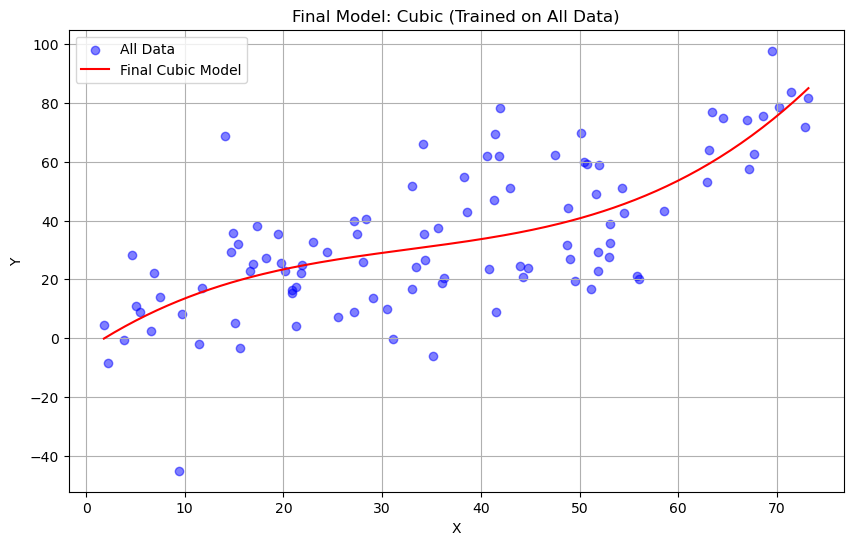

In [52]:

# First phase: Train and validate models
print("Phase 1: Training and Validation")
print("-" * 50)
print("\nTraining Metrics:")
for model, metrics in train_metrics.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

print("\nTest Metrics:")
for model, metrics in test_metrics.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

# Determine best model based on test set R²
best_model = max(test_metrics.items(), key=lambda x: x[1]['R2'])[0]
print(f"\nBest performing model on test set: {best_model}")

# Phase 2: Retrain best model on all data
print("\nPhase 2: Retraining Best Model on All Data")
print("-" * 50)

# Combine train and test data
X_all = np.concatenate([x_train, x_test])
y_all = np.concatenate([y_train, y_test])

# Retrain based on which model was best
if best_model == 'Linear' or best_model == 'Best Fit Line':
    final_params, _ = curve_fit(linear, X_all, y_all)
    final_prediction = linear(X_all, *final_params)
    model_func = linear
elif best_model == 'Quadratic':
    final_params, _ = curve_fit(quadratic, X_all, y_all)
    final_prediction = quadratic(X_all, *final_params)
    model_func = quadratic
elif best_model == 'Cubic':
    final_params, _ = curve_fit(cubic, X_all, y_all)
    final_prediction = cubic(X_all, *final_params)
    model_func = cubic
elif best_model == 'Exponential':
    final_params, _ = curve_fit(exponential, X_all, y_all)
    final_prediction = exponential(X_all, *final_params)
    model_func = exponential

# Calculate final metrics
final_RMSE = rmse(y_all, final_prediction)
final_r2 = r2_score(y_all, final_prediction)

print(f"Final model metrics (trained on all data):")
print(f"RMSE = {final_RMSE:.4f}, R² = {final_r2:.4f}")

# Plot final result
plt.figure(figsize=(10, 6))
plt.scatter(X_all, y_all, color='blue', alpha=0.5, label='All Data')

# Create smooth curve for final model
X_smooth = np.linspace(min(X_all), max(X_all), 200)
y_smooth = model_func(X_smooth, *final_params)
plt.plot(X_smooth, y_smooth, 'r-', label=f'Final {best_model} Model')

plt.title(f'Final Model: {best_model} (Trained on All Data)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()